In [144]:
import numpy as np
from matplotlib import pyplot as plt#グラフを書くときは matplotlibライブラリの pyplot が必要
#Jupyterでインライン表示するための宣言
%matplotlib inline 

In [349]:
class SOM():#SOMという名前のclassを創る
   
    #classの内部はすべてdefで定義する
    #第一引数に「self」が指定する＝コンストラクタ
    def __init__(self, teachers, N, seed=None):
        #インスタンス変数teachersを初期化したことになる
        #selfのなかにteachersを持たせnumpyの配列arrayに定義
        self.teachers = np.array(teachers)
        self.n_teacher = self.teachers.shape[0] #.shape:行列の大きさ。.shape[0]:行列の行数。.shape[1]:行列の列数
        self.N = N
        if not seed is None:
            np.random.seed(seed)#乱数の固定
            
        x, y = np.meshgrid(range(self.N), range(self.N)) # 各座標の要素列から格子座標を作成するために使う
        #ユニットの位置 #400*2の行列
        self.c = np.hstack((x.flatten()[:, np.newaxis],
                            y.flatten()[:, np.newaxis])) #hstack :横（hstack）に連結。x.flattenとy.flattenをくっつける 
        #ユニットの更新
        self.nodes = np.random.rand(self.N*self.N,
                                    self.teachers.shape[1])#random.rand:乱数の自動生成#self.teachersの列数
    
    def train(self):
        for i, teacher in enumerate(self.teachers): #teacherは入力ベクトル
            bmu = self._best_matching_unit(teacher) #BMU:データに対し最も似ているベクトルを持つユニットあとで定義
            d = np.linalg.norm(self.c - bmu, axis=1) #ユニットの位置とBMUとの距離
            L = self._learning_ratio(i) #学習時間を決定するパラメータ#iはe^(-t/λ)
            S = self._learning_radius(i, d) #更新するユニットがどの程度BMUの近傍にいるのかを表現
            
            #ユニットの更新
            self.nodes += L * S[:, np.newaxis] * (teacher - self.nodes)
        return self.nodes
    
    #BMUの定義
    def _best_matching_unit(self, teacher):
        #compute all norms (square)
        norms = np.linalg.norm(self.nodes - teacher, axis=1)
        bmu = np.argmin(norms) #argment with minimum element 
        return np.unravel_index(bmu,(self.N, self.N))#ユニットの場所2次元
    
    #BMUの近傍を定義(_learning_radius(S)に使う)
    def _neighbourhood(self, t):#neighbourhood radious
        halflife = float(self.n_teacher/4) #for testing #時定数
        initial  = float(self.N/4) 
        return initial*np.exp(-t/halflife)
    
    #L
    def _learning_ratio(self, t):#ratio:比率
        halflife = float(self.n_teacher/4) #for testing #時定数
        initial  = 0.1 #Lの初期値
        return initial*np.exp(-t/halflife)
    
    #S
    def _learning_radius(self, t, d):#radius:半径
        # d is distance from BMU
        s = self._neighbourhood(t)
        return np.exp(-d**2/(2*s**2))       
        

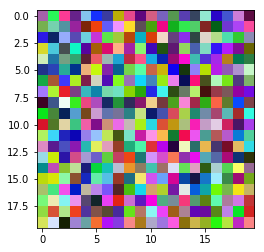

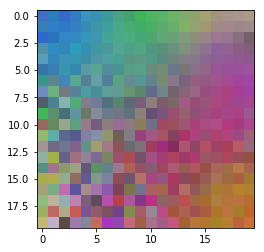

In [313]:
N = 20 #ユニットの行列
teachers = np.random.rand(1000, 3)#(学習回数，次元)
som = SOM(teachers, N, seed=30)#乱数の初期条件

# Initial map #S初期のSOM
plt.imshow(som.nodes.reshape((N, N, 3)),
           interpolation='none')#interpolation:改変、挿入
plt.show()

# Train #SOM()内で定義したtrain関数を呼び出す
som.train()

# Trained MAP
plt.imshow(som.nodes.reshape((N, N, 3)),
           interpolation='none')
plt.show()

In [292]:
import pandas as pd
df = pd.read_csv('iris_data.csv')
df.head()
#df.shape

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [323]:
#X0 = np.array(df.loc[:, ['SepalLength']])
#X1 = np.array(df.loc[:, ['SepalWidth']])
#X2 = np.array(df.loc[:, ['PetalLength']])
#X3 = np.array(df.loc[:, ['PetalWidth']])
#X = [X0,X1, X2, X3]

for i in range(len(df)):
    X = np.array(df.loc[i,'SepalLength':'PetalWidth'])
    #print(X)

i=1
X = np.array(df.loc[i,'SepalLength':'PetalWidth'].values)    
y = np.array(df.loc[:, ['Name']])
#print(X0[1])
#print(X[1])
a=[1,2]
print(a[1])
print(X)
print(len(np.unique(y)))
print((np.unique(y))[0])
print(y[50])

2
[4.9 3.  1.4 0.2]
3
0
[1]


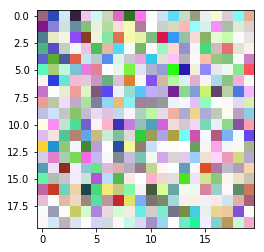

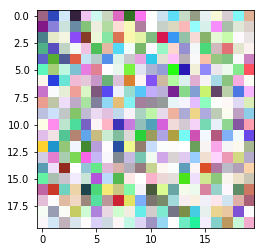

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


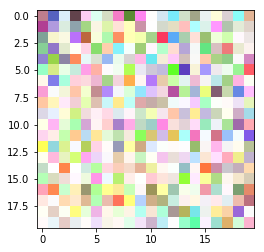

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


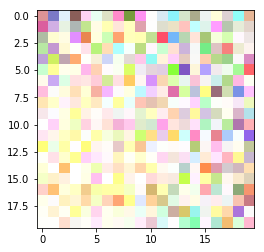

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


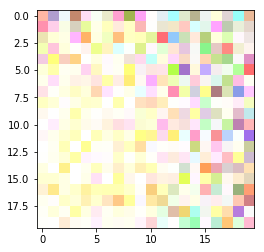

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


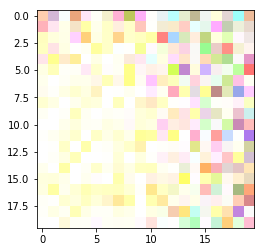

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


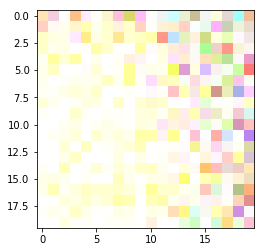

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


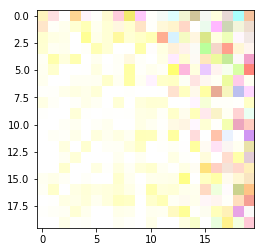

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


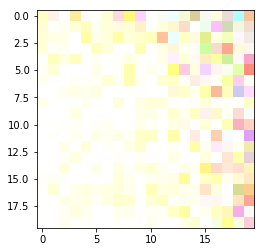

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


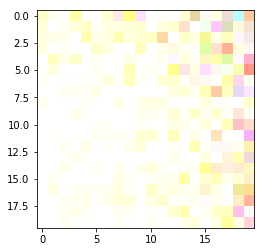

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


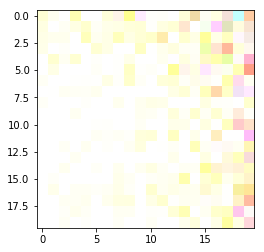

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


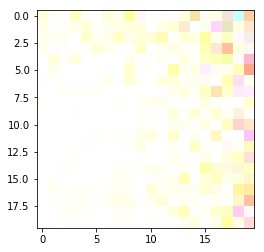

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


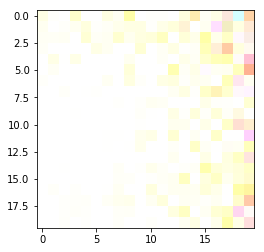

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


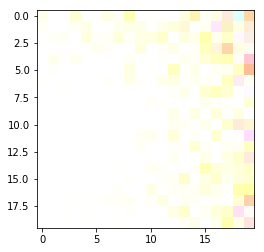

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


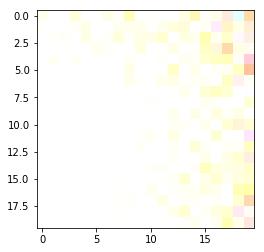

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


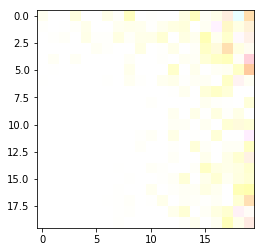

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


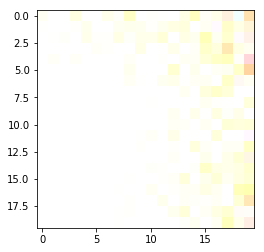

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


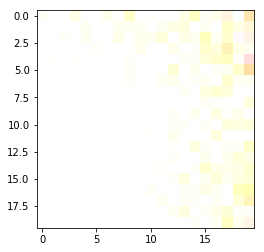

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


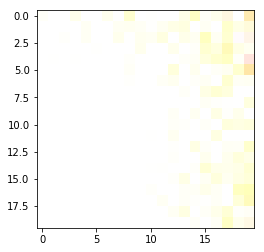

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


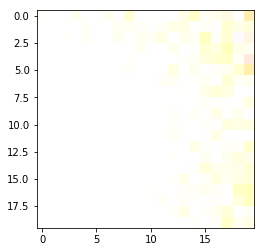

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


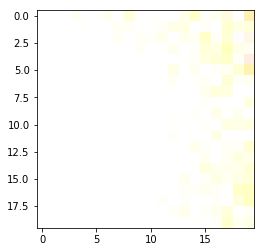

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


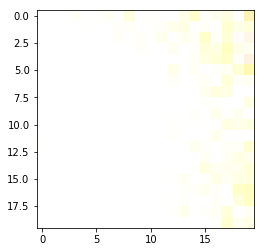

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


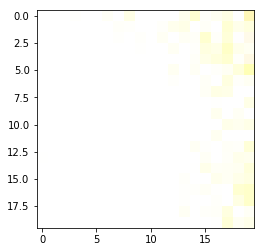

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


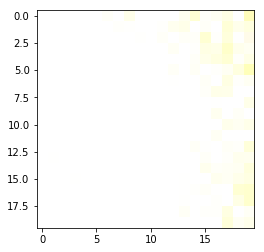

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


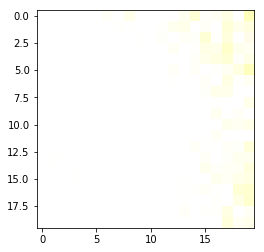

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


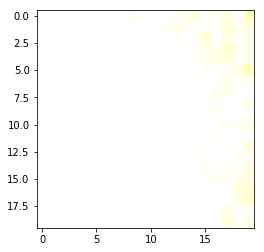

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


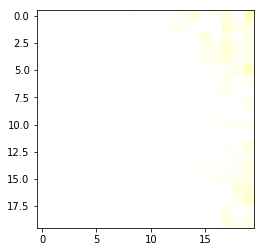

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


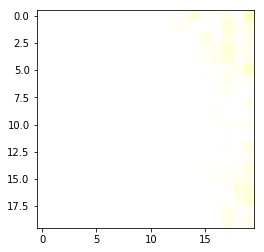

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


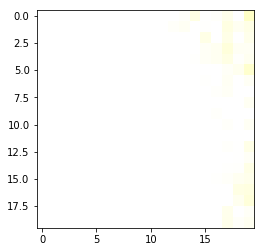

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


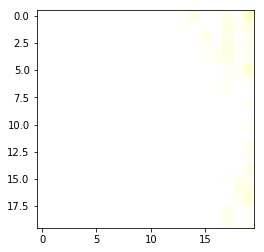

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


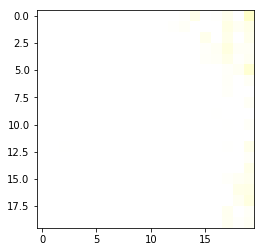

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


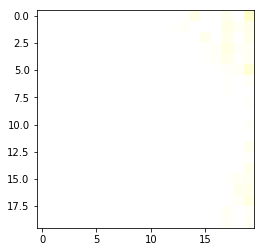

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


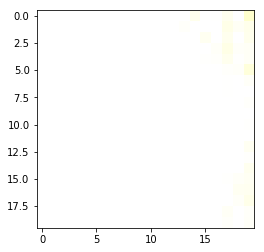

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


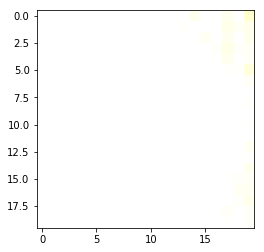

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


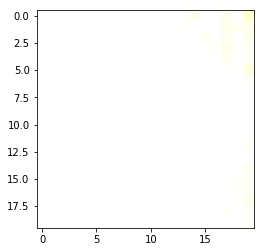

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


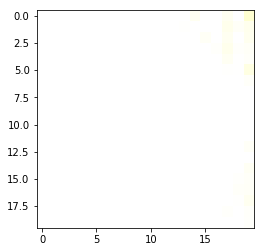

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


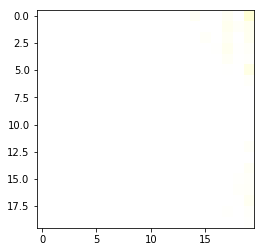

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


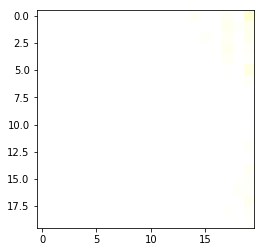

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


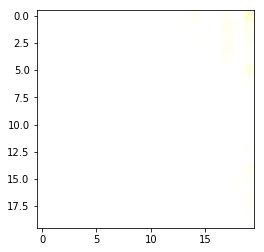

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


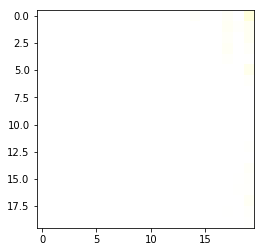

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


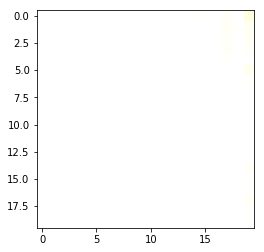

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


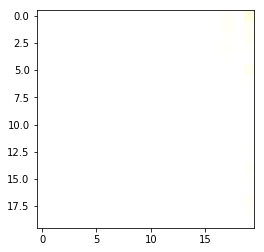

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


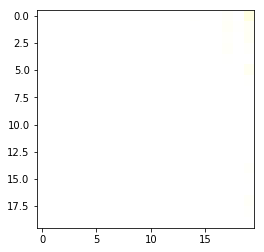

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


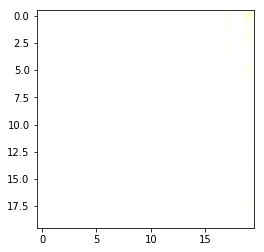

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


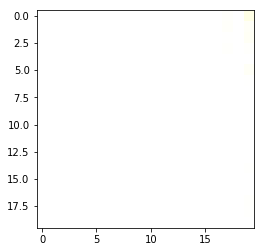

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


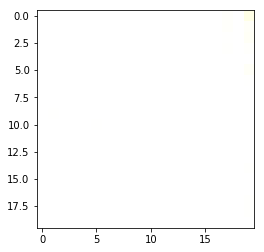

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


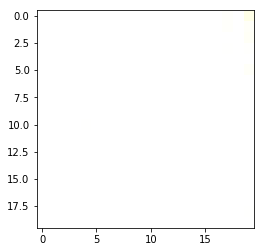

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


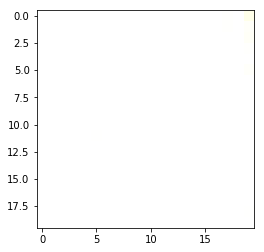

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


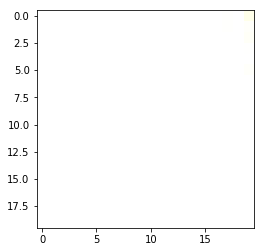

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


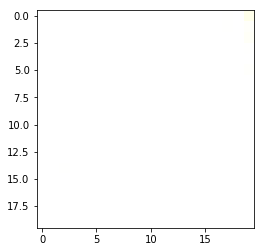

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


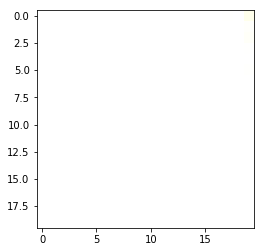

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


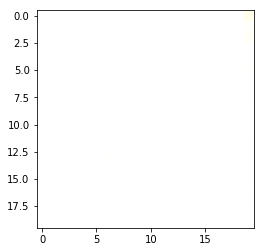

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


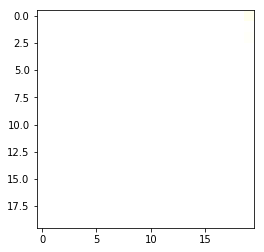

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


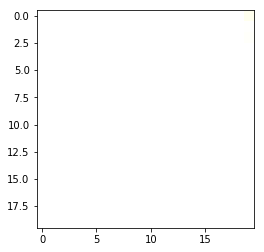

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


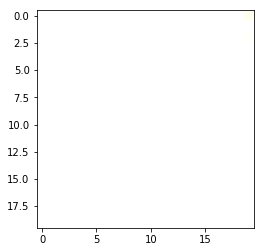

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


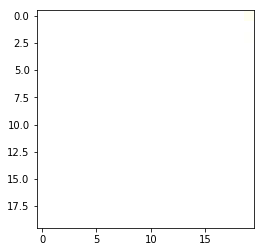

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


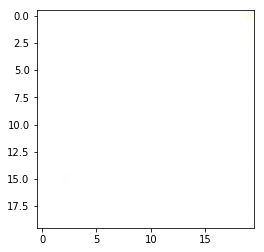

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


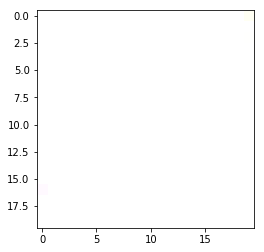

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


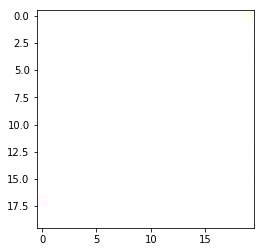

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


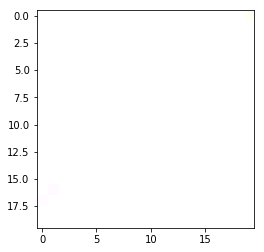

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


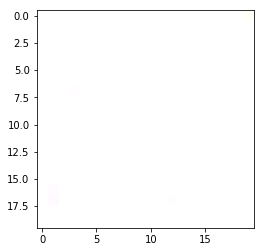

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


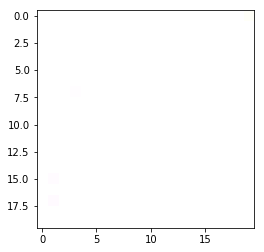

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


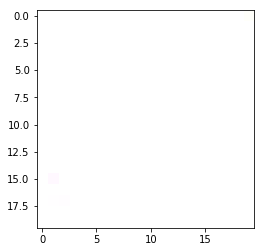

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


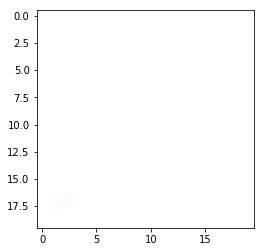

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


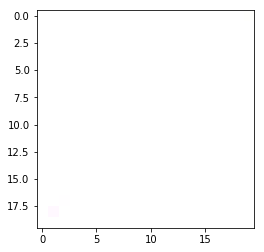

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


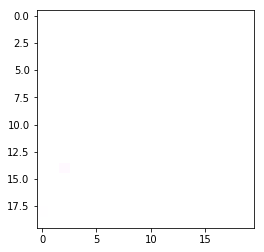

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


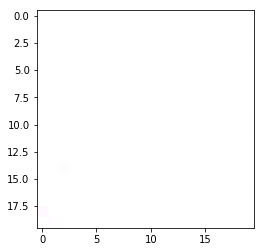

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


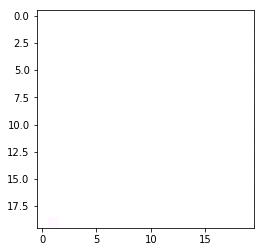

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


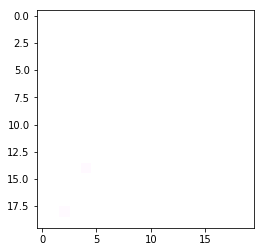

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


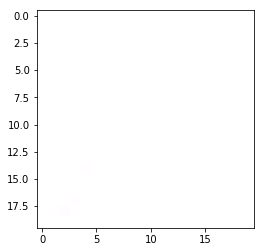

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


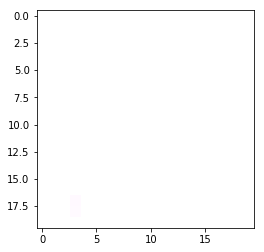

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


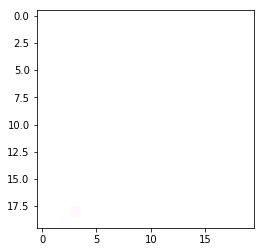

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


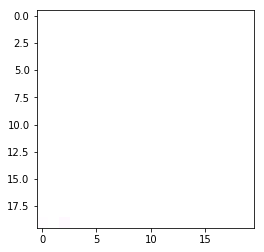

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


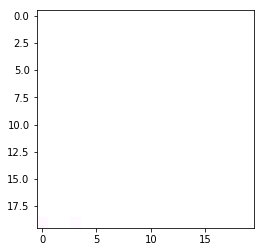

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


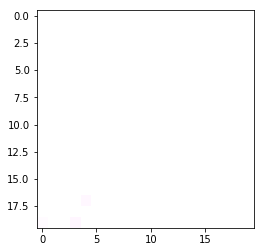

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


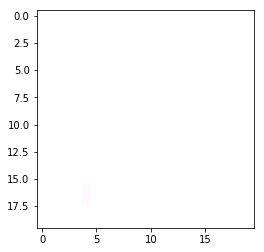

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


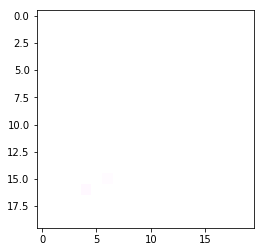

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


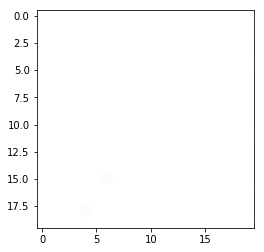

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


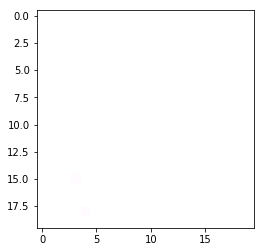

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


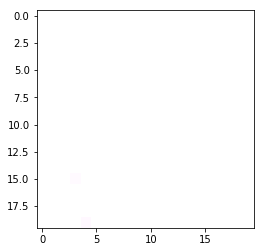

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


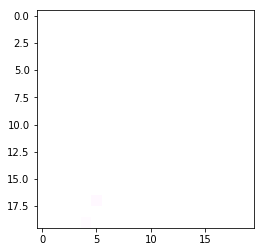

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


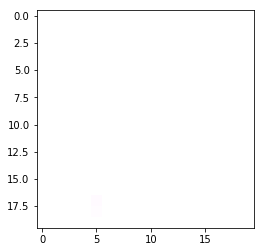

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


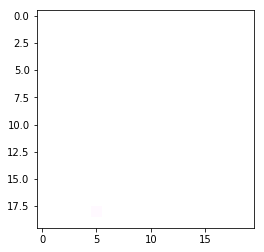

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


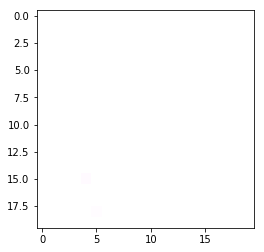

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


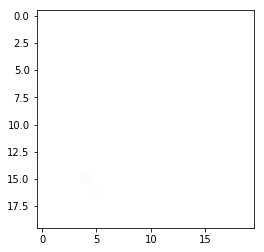

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


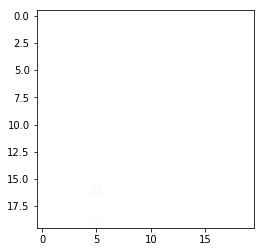

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


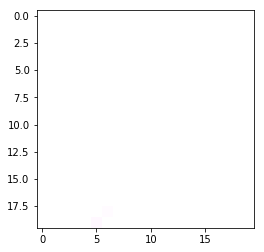

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


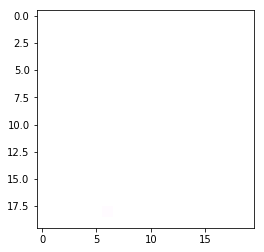

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


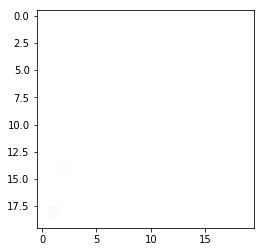

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


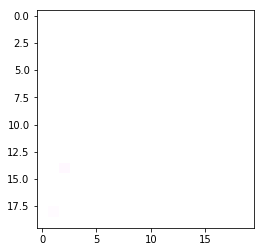

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


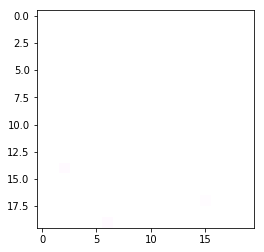

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


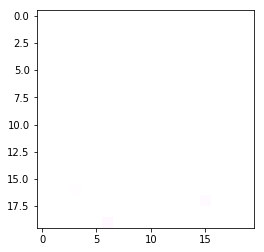

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


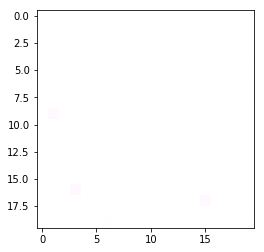

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


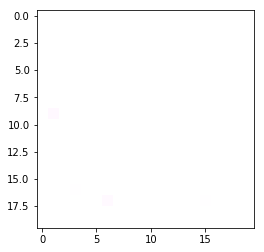

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


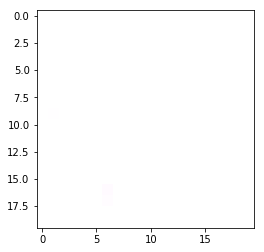

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


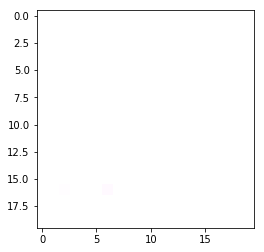

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


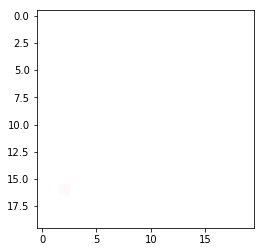

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


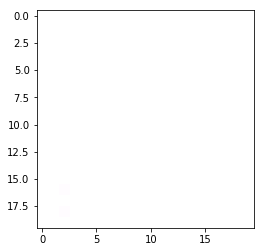

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


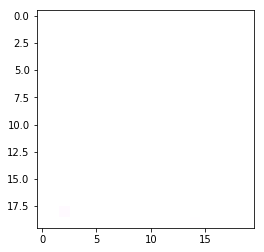

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


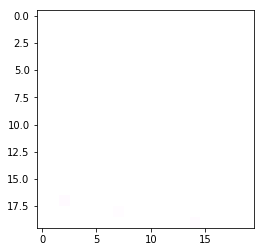

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


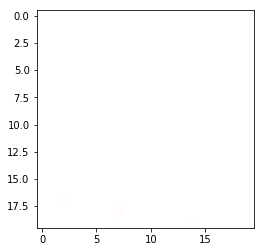

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


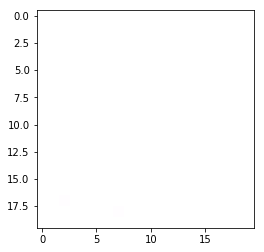

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


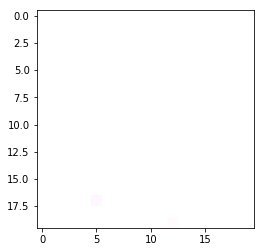

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


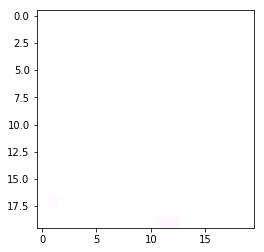

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


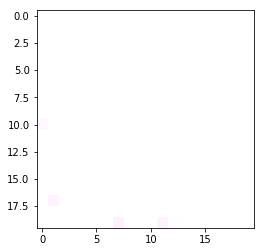

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


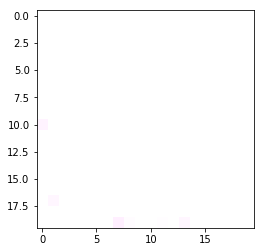

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


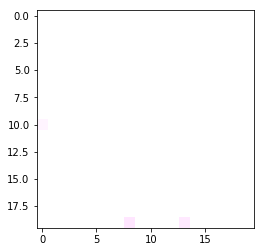

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


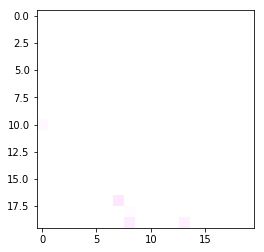

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


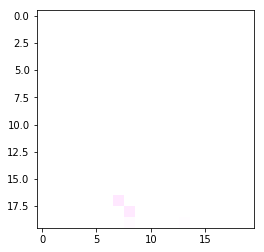

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


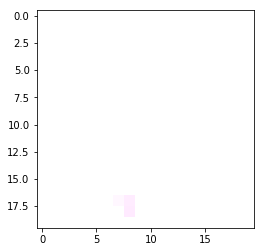

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


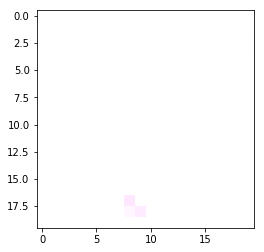

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


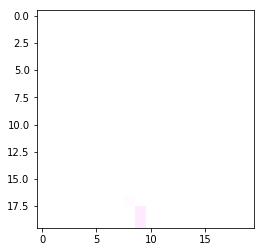

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


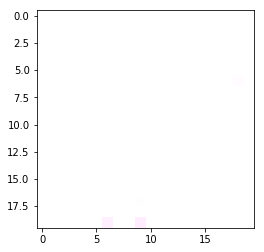

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


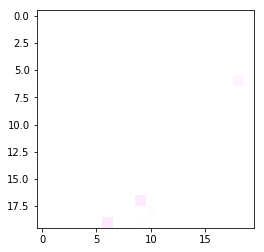

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


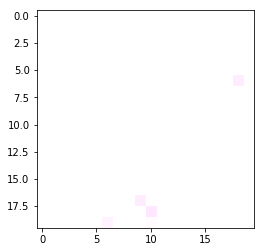

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


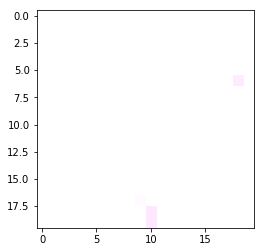

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


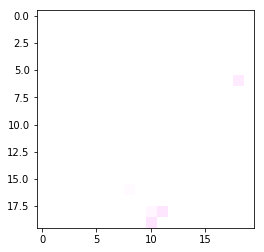

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


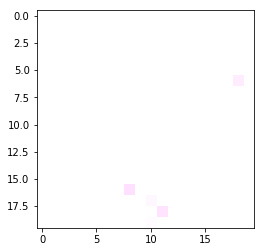

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


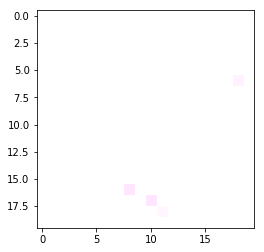

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


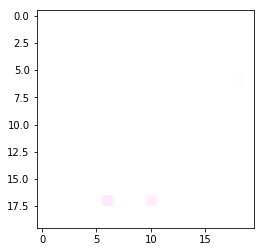

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


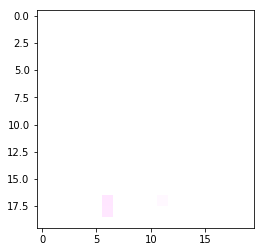

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


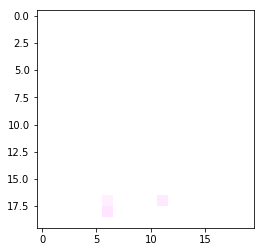

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


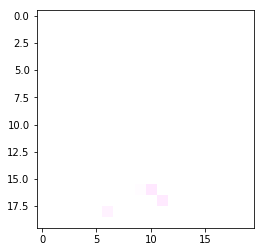

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


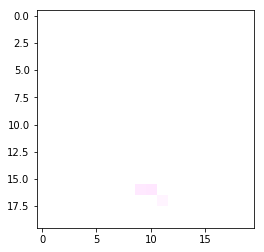

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


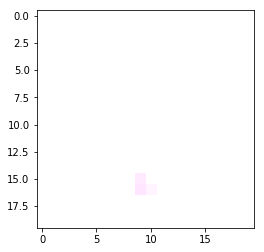

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


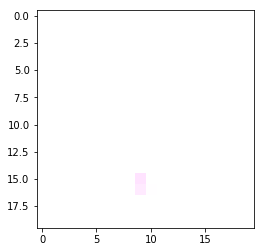

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


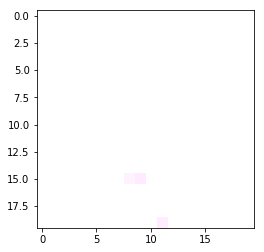

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


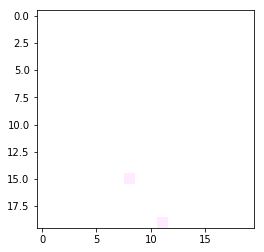

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


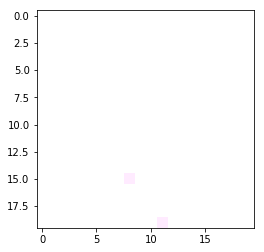

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


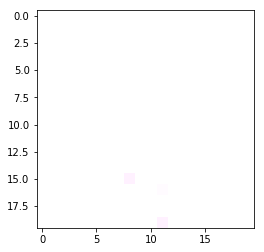

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


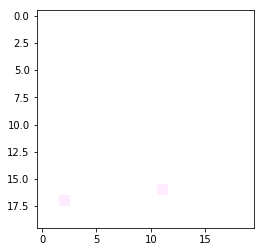

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


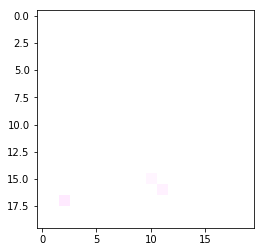

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


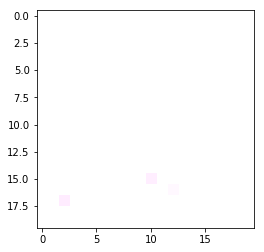

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


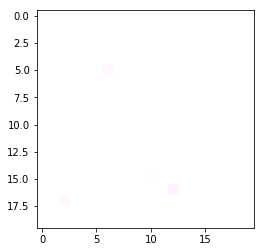

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


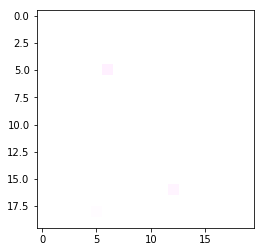

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


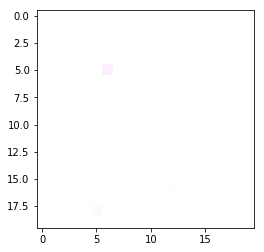

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


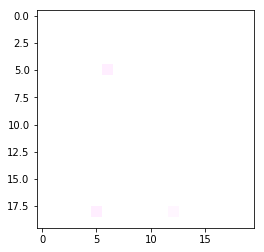

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


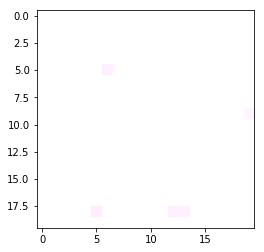

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


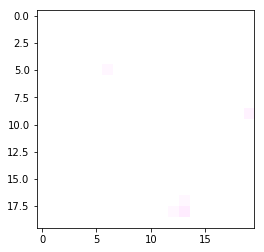

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


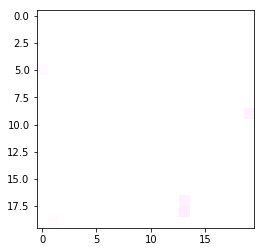

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


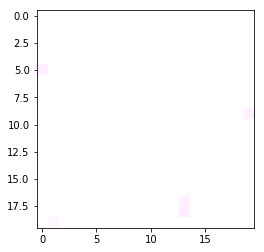

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


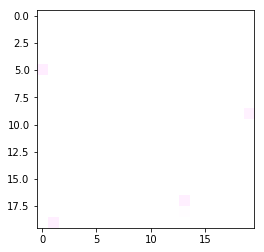

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


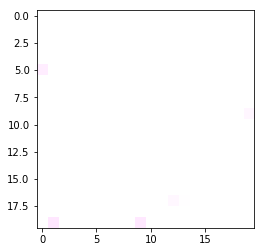

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


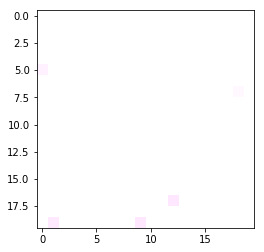

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


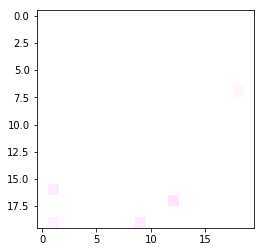

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


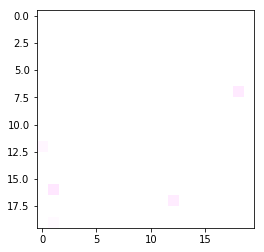

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


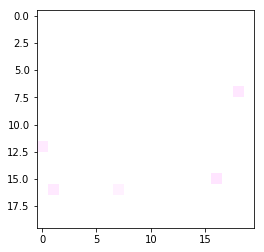

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


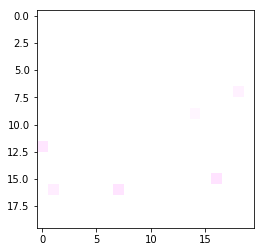

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


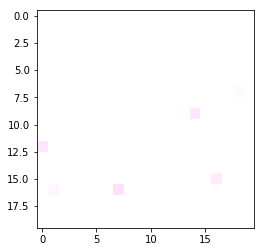

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


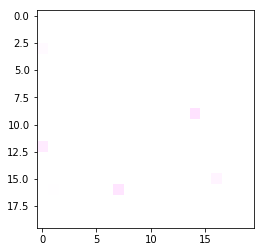

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


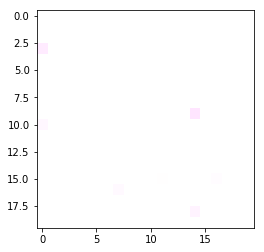

In [351]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

N = 20#linear size of 2D map
n_teacher = len(df) #教師データの数(学習回数)#行数
np.random.seed(100)#test seed for random number
dimension= 4#ベクトルの次元

def main():
    #初期ノードベクトル
    # N x N ×dimension の配列の乱数
    nodes = np.random.rand(N, N, dimension)#ノードの配列。それぞれのノードがdimension次元のベクトルを持つ
    #activation = np.random.rand(N,N,3)
    
    #初期map出力
    #plt.imshow(activation,interpolation = 'none')
    #plt.show()
    cmap = matplotlib.cm.cool#色をグラデーション的に選択
    cmap.set_bad(color='black')#マスク値に使用する色を設定

    plt.imshow(nodes, cmap=cmap)
    plt.show()
    
    
    for i in range(n_teacher):#150回
        #教師信号
        teachers = np.array(df.loc[i,'SepalLength':'PetalWidth'].values) #X #150 * 4
        train(nodes, teachers)
                
        #中間の出力
        #if i==0:
            #plt.imshow(plt.figure(), interpolation='none')
            #plt.imshow((nodes * 255).astype(np.uint8), interpolation='none')
            #plt.show()
        
        #if i%100 == 0:#if i%1000 == 0 or i<100:
            #plt.imshow((nodes * 255).astype(np.uint8), interpolation='none')
            #plt.show()
            #plt.savefig(f'som{i}.png', dpi = 400, bbox_inches = 'tight')
    
    #出力 #heat_map
    #plt.imshow((nodes * 255).astype(np.uint8), interpolation='none')
    #plt.imshow(activation, interpolation = 'none')
    #plt.show()
    
def train(nodes, teachers):
    
    #(N,N,dimension),() 
    bmu = best_matching_unit(nodes, teachers)#BMU:データに対し最も似ているベクトルを持つユニットあとで定義

    for x in range(N):
        for y in range(N):
            c = np.array([x,y])
            d = np.linalg.norm(c - bmu)#ユニットの位置とBMUとの距離
            L = learning_ratio(i)#学習時間を決定するパラメータ#iはe^(-t/λ)
            S = learning_radius(i, d)#更新するユニットがどの程度BMUの近傍にいるのかを表現
            #nodes.z= z1#z1:４次元
            for z in range(dimension):
                nodes[x, y, z] += L * S * (teachers[z] - nodes[x, y, z])#zはがくの長さなど
            """
            if z1 <> nodes.z:
                if y[i]==[0]:
                    nodes.z = (1,0,0,0)
                elif y[i]==[1]:
                    nodes.z = (0,1,0,0)
                elif y[i]==[2]:
                    nodes.z = (0,0,1,0)
                else:
                    nodes.z = (0,0,0,0)
             """   
                
def best_matching_unit(nodes, teacher):
    norms = np.zeros((N,N))# N×Nの２次元配列を生成
    for x in range (N):
        for y in range(N):
            for z in range(dimension):
                norms[x, y] += (nodes[x,y,z] - teacher[z])**2
    
    bmu_1 = np.argmin(norms)#１次元配列で考えたとき何番目かを返す
    bmu = np.unravel_index(bmu_1,(N,N))
    
    value = -1
    nodes[bmu[0], bmu[1]] = -1  # Values to set -1

    masked_array = np.ma.masked_where(nodes == value, nodes)#条件が満たされる場所で配列をマスクする
    #cmap = matplotlib.colors.Colormap(name, N=256)
    cmap = matplotlib.cm.cool#色をグラデーション的に選択
    cmap.set_bad(color='black')#マスク値に使用する色を設定

    plt.imshow(masked_array, cmap=cmap)
    plt.show()

    return bmu #argminと組み合わせることで,もとの行列の何行何列目に最小値があるのかわかる

def neighbourhood(t):
    halflife = float(n_teacher/4)#時定数
    initial = float(N/2)
    return initial*np.exp(-t/halflife)

def learning_ratio(t):
    halflife=float(n_teacher/4)#時定数
    initial=0.1#Lの初期値
    return initial*np.exp(-t/halflife)

def learning_radius(t, d):
    s=neighbourhood(t)
    return np.exp(-d**2/(2*s**2))

main()

<IPython.core.display.Javascript object>


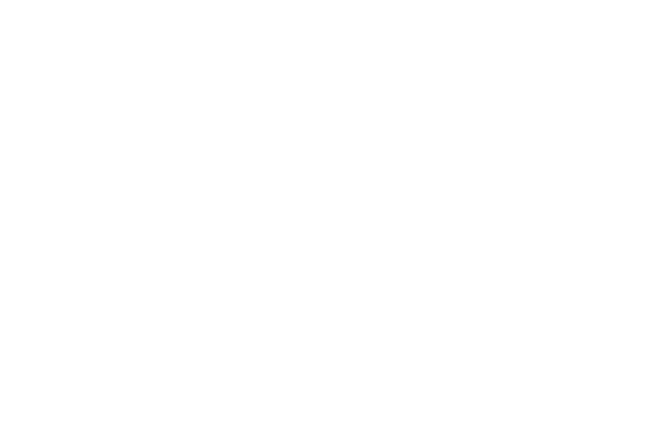

AttributeError: 'function' object has no attribute 'nodes'

<IPython.core.display.Javascript object>


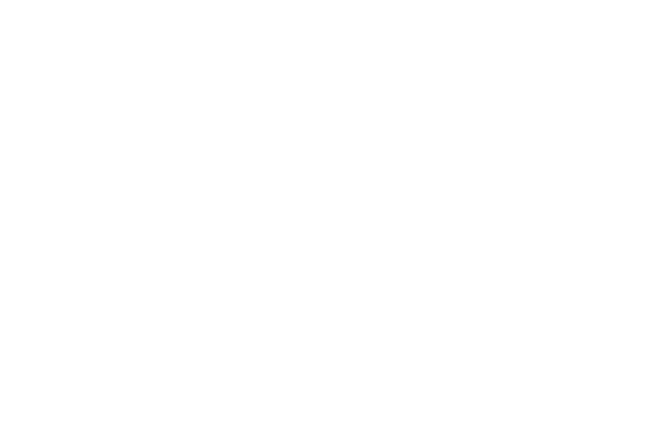

In [307]:
%matplotlib notebook
import matplotlib.animation as animation


fig = plt.figure()

ims = []

for i in range(n_teacher):
        im = plt.imshow(main.nodes, interpolation = 'none')            # 乱数をグラフにする
        ims.append(im)                  # グラフを配列 ims に追加

# 10枚のプロットを 100ms ごとに表示
ani = animation.ArtistAnimation(fig, n_teacher, interval=100)
plt.show()

<IPython.core.display.Javascript object>


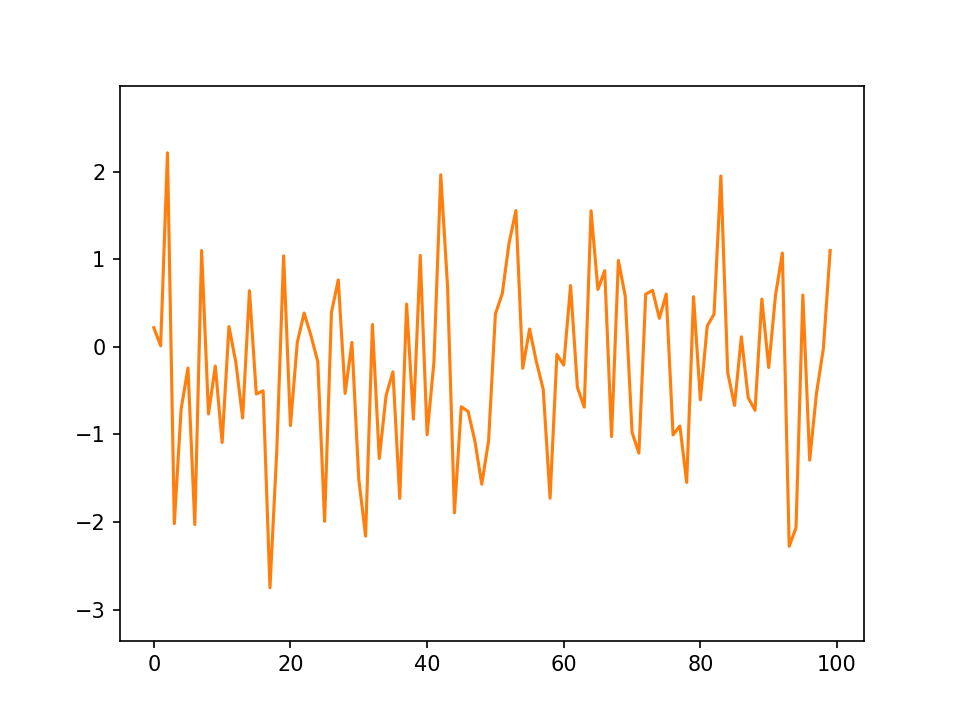

In [136]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()

ims = []

for i in range(10):
        rand = np.random.randn(100)     # 100個の乱数を生成
        im = plt.plot(rand)             # 乱数をグラフにする
        ims.append(im)                  # グラフを配列 ims に追加

# 10枚のプロットを 100ms ごとに表示
ani = animation.ArtistAnimation(fig, ims, interval=100)
plt.show()


<IPython.core.display.Javascript object>


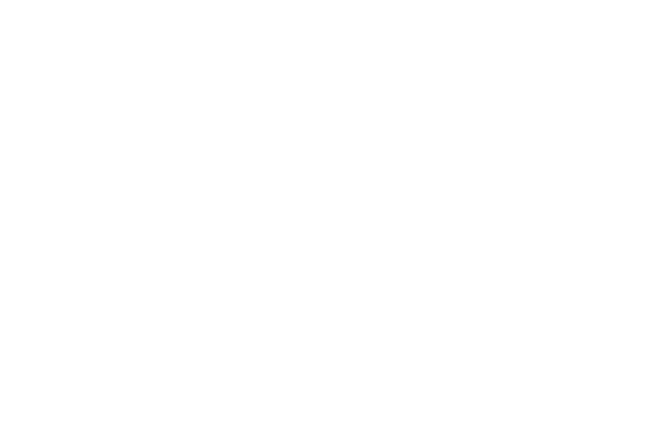

<IPython.core.display.Javascript object>


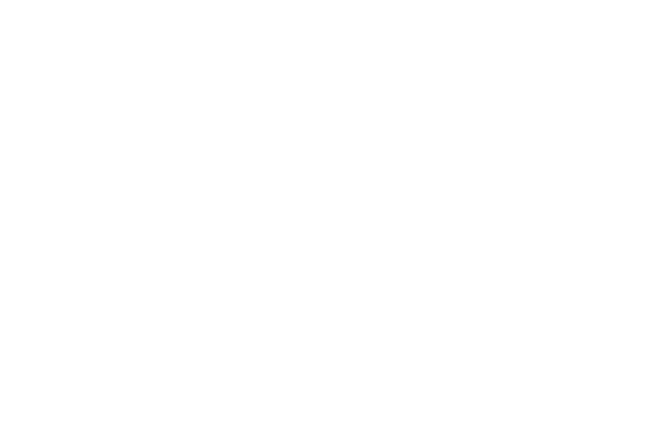

Traceback (most recent call last):
  File "C:\Users\Shiori\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 215, in process
    func(*args, **kwargs)
  File "C:\Users\Shiori\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [305]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

row = 40
col = 40
learntime = 100000
alpha = 0.05
weight = np.random.random([row,col,3])

def som(colorvec):
    min_index = np.argmin(((weight-colorvec)**2).sum(axis=2))
    mini = int(min_index / col)
    minj = int(min_index % col)
    for i in range(-2,3):
        for j in range(-2,3):
            try:
                weight[mini+i,minj+j] += alpha * (colorvec - weight[mini+i,minj+j])/(abs(i)+abs(j)+1)
            except:
                pass

def show_rslt():
    im = plt.imshow(weight,interpolation='none')
    return im
    
fig = plt.figure()
plt.axis('off')
ims = []
for time in range(learntime):
    color = np.random.rand(3)
    som(color)
    if time % 500 == 0:
        ims.append([show_rslt()])
ani = animation.ArtistAnimation(fig, ims)
# ani.save('som.mp4') # <- NOT able to use on Windows
plt.show()